In [ ]:
from scipy.spatial import distance as ssd
from scipy.cluster import hierarchy as sch
import pylab
import numpy as np
import matplotlib.pyplot as plt

D = np.load('/content/drive/MyDrive/Hist-MMD/data/MMD_matrix/D_1051_blur_10.npy', mmap_mode='r')
idx = np.load('/content/drive/MyDrive/Hist-MMD/data/MMD_matrix/slide_IDs_1051.npy',mmap_mode='r')


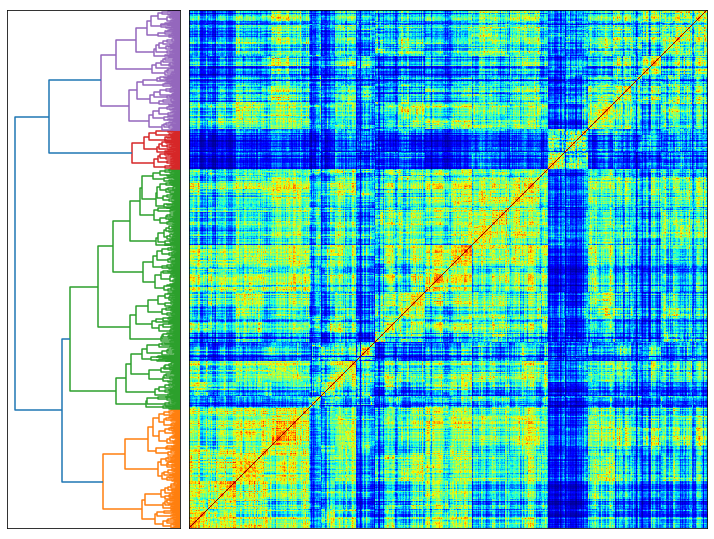

In [ ]:


fig = pylab.figure(figsize=(12,9))
plt.set_cmap('jet')
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])

Kimage = np.exp(-1/np.median(D)*D)

dK = ssd.squareform(1-Kimage)
Y = sch.linkage(dK, method='ward')
Z = sch.dendrogram(Y, orientation='left')
axdendro.set_xticks([])
axdendro.set_yticks([])
# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
display_matrix = Kimage+0 #display kernel matrix
display_matrix = display_matrix[index,:]
display_matrix = display_matrix[:,index]
im = axmatrix.matshow(display_matrix, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])
# Plot colorbar.
pylab.colorbar(im, cax=axcolor)
# Display and save figure.
plt.savefig('kernel.pdf')
fig.show()